In [246]:
#Import libraries 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime as dt
import statsmodels.api as sm
import numpy as np 

In [247]:
#Import data
data = pd.read_csv('Data analyst Task.csv')
data.head(10)

,order_id,user_id,created_at,discount_cost,discount_type,basket
0,1,1,4/12/2021,10000,1.0,12000
1,2,2,5/9/2021,0,NaN,20000
2,3,3,5/9/2021,10000,1.0,14000
3,4,4,11/10/2021,0,NaN,15000
4,5,5,11/10/2021,10000,1.0,16000
5,6,6,1/1/2022,0,NaN,10000
6,7,7,1/1/2022,0,NaN,29500
7,8,8,1/1/2022,10000,1.0,10000
8,9,9,1/1/2022,0,NaN,5000
9,10,10,1/1/2022,0,NaN,35000


In [248]:
#Data prepration
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29057 entries, 0 to 29056
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       29057 non-null  int64  
 1   user_id        29057 non-null  int64  
 2   created_at     29057 non-null  object 
 3   discount_cost  29057 non-null  int64  
 4   discount_type  6925 non-null   float64
 5   basket         29057 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 1.3+ MB


In [249]:
data['discount_type'] = data['discount_type'].fillna(0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29057 entries, 0 to 29056
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       29057 non-null  int64  
 1   user_id        29057 non-null  int64  
 2   created_at     29057 non-null  object 
 3   discount_cost  29057 non-null  int64  
 4   discount_type  29057 non-null  float64
 5   basket         29057 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 1.3+ MB


In [250]:
data.head()

,order_id,user_id,created_at,discount_cost,discount_type,basket
0,1,1,4/12/2021,10000,1.0,12000
1,2,2,5/9/2021,0,0.0,20000
2,3,3,5/9/2021,10000,1.0,14000
3,4,4,11/10/2021,0,0.0,15000
4,5,5,11/10/2021,10000,1.0,16000


In [251]:
data['created_at'] = pd.to_datetime(data['created_at'])
data.head()

,order_id,user_id,created_at,discount_cost,discount_type,basket
0,1,1,2021-04-12,10000,1.0,12000
1,2,2,2021-05-09,0,0.0,20000
2,3,3,2021-05-09,10000,1.0,14000
3,4,4,2021-11-10,0,0.0,15000
4,5,5,2021-11-10,10000,1.0,16000


In [252]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29057 entries, 0 to 29056
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       29057 non-null  int64         
 1   user_id        29057 non-null  int64         
 2   created_at     29057 non-null  datetime64[ns]
 3   discount_cost  29057 non-null  int64         
 4   discount_type  29057 non-null  float64       
 5   basket         29057 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 1.3 MB


In [253]:
data1 = data.drop(index = list(range(5)))
data1

,order_id,user_id,created_at,discount_cost,discount_type,basket
5,6,6,2022-01-01,0,0.0,10000
6,7,7,2022-01-01,0,0.0,29500
7,8,8,2022-01-01,10000,1.0,10000
8,9,9,2022-01-01,0,0.0,5000
9,10,10,2022-01-01,0,0.0,35000
...,...,...,...,...,...,...
29052,29053,6622,2022-07-31,0,0.0,18000
29053,29054,9985,2022-07-31,0,0.0,25000
29054,29055,8843,2022-07-31,6000,1.0,24000
29055,29056,8703,2022-07-31,0,0.0,40000


In [254]:
data1.index = range(29052)
data1

,order_id,user_id,created_at,discount_cost,discount_type,basket
0,6,6,2022-01-01,0,0.0,10000
1,7,7,2022-01-01,0,0.0,29500
2,8,8,2022-01-01,10000,1.0,10000
3,9,9,2022-01-01,0,0.0,5000
4,10,10,2022-01-01,0,0.0,35000
...,...,...,...,...,...,...
29047,29053,6622,2022-07-31,0,0.0,18000
29048,29054,9985,2022-07-31,0,0.0,25000
29049,29055,8843,2022-07-31,6000,1.0,24000
29050,29056,8703,2022-07-31,0,0.0,40000


In [255]:
# cohort analysis
data1['cohort_date'] = data1.groupby('user_id')['created_at'].transform('min')
data1['cohort_date']

0       2022-01-01
1       2022-01-01
2       2022-01-01
3       2022-01-01
4       2022-01-01
           ...    
29047   2022-05-18
29048   2022-07-31
29049   2022-07-07
29050   2022-07-04
29051   2022-04-04
Name: cohort_date, Length: 29052, dtype: datetime64[ns]

In [256]:
data1

,order_id,user_id,created_at,discount_cost,discount_type,basket,cohort_date
0,6,6,2022-01-01,0,0.0,10000,2022-01-01
1,7,7,2022-01-01,0,0.0,29500,2022-01-01
2,8,8,2022-01-01,10000,1.0,10000,2022-01-01
3,9,9,2022-01-01,0,0.0,5000,2022-01-01
4,10,10,2022-01-01,0,0.0,35000,2022-01-01
...,...,...,...,...,...,...,...
29047,29053,6622,2022-07-31,0,0.0,18000,2022-05-18
29048,29054,9985,2022-07-31,0,0.0,25000,2022-07-31
29049,29055,8843,2022-07-31,6000,1.0,24000,2022-07-07
29050,29056,8703,2022-07-31,0,0.0,40000,2022-07-04


In [257]:
data1['cohort_month'] = data1['cohort_date'].apply(lambda x : x.strftime('%Y-%m') )
data1

,order_id,user_id,created_at,discount_cost,discount_type,basket,cohort_date,cohort_month
0,6,6,2022-01-01,0,0.0,10000,2022-01-01,2022-01
1,7,7,2022-01-01,0,0.0,29500,2022-01-01,2022-01
2,8,8,2022-01-01,10000,1.0,10000,2022-01-01,2022-01
3,9,9,2022-01-01,0,0.0,5000,2022-01-01,2022-01
4,10,10,2022-01-01,0,0.0,35000,2022-01-01,2022-01
...,...,...,...,...,...,...,...,...
29047,29053,6622,2022-07-31,0,0.0,18000,2022-05-18,2022-05
29048,29054,9985,2022-07-31,0,0.0,25000,2022-07-31,2022-07
29049,29055,8843,2022-07-31,6000,1.0,24000,2022-07-07,2022-07
29050,29056,8703,2022-07-31,0,0.0,40000,2022-07-04,2022-07


In [258]:
def get_date_elements(df,col):
    day = df[col].dt.day
    month = df[col].dt.month
    year = df[col].dt.year
    
    return  day , month , year


In [259]:
_ , creat_month ,creat_year  = get_date_elements(data1,'created_at')
_ , cohort_month ,cohort_year  = get_date_elements(data1,'cohort_date')

In [260]:
creat_year

0        2022
1        2022
2        2022
3        2022
4        2022
         ... 
29047    2022
29048    2022
29049    2022
29050    2022
29051    2022
Name: created_at, Length: 29052, dtype: int64

In [261]:
cohort_month

0        1
1        1
2        1
3        1
4        1
        ..
29047    5
29048    7
29049    7
29050    7
29051    4
Name: cohort_date, Length: 29052, dtype: int64

In [262]:
#cohort index  
year_diff = creat_year - cohort_year
month_diff = creat_month - cohort_month
data1['cohort_index'] = year_diff * 12 + month_diff  
data1.tail()

,order_id,user_id,created_at,discount_cost,discount_type,basket,cohort_date,cohort_month,cohort_index
29047,29053,6622,2022-07-31,0,0.0,18000,2022-05-18,2022-05,2
29048,29054,9985,2022-07-31,0,0.0,25000,2022-07-31,2022-07,0
29049,29055,8843,2022-07-31,6000,1.0,24000,2022-07-07,2022-07,0
29050,29056,8703,2022-07-31,0,0.0,40000,2022-07-04,2022-07,0
29051,29057,4424,2022-07-31,0,0.0,17000,2022-04-04,2022-04,3


In [263]:
cohort_data = data1.groupby(['cohort_month','cohort_index'])['user_id'].nunique().reset_index()
cohort_data

,cohort_month,cohort_index,user_id
0,2022-01,0,1492
1,2022-01,1,457
2,2022-01,2,365
3,2022-01,3,378
4,2022-01,4,316
5,2022-01,5,317
6,2022-01,6,324
7,2022-02,0,1539
8,2022-02,1,385
9,2022-02,2,393


In [264]:
cohort_table = cohort_data.pivot_table(index = 'cohort_month' , columns= 'cohort_index' , values = 'user_id')
cohort_table

cohort_index,0,1,2,3,4,5,6
cohort_month,,,,,,,
2022-01,1492.0,457.0,365.0,378.0,316.0,317.0,324.0
2022-02,1539.0,385.0,393.0,362.0,354.0,337.0,NaN
2022-03,1258.0,306.0,275.0,259.0,277.0,NaN,NaN
2022-04,1592.0,421.0,389.0,391.0,NaN,NaN,NaN
2022-05,1192.0,352.0,287.0,NaN,NaN,NaN,NaN
2022-06,1397.0,405.0,NaN,NaN,NaN,NaN,NaN
2022-07,1515.0,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='cohort_index', ylabel='cohort_month'>

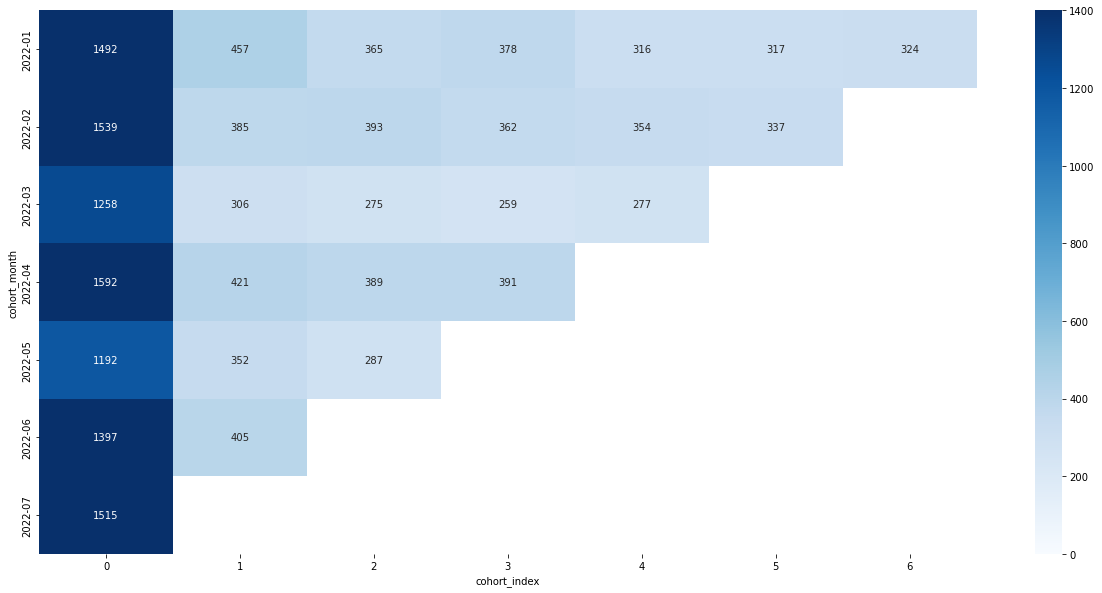

In [316]:
#Heatmap 
plt.figure(figsize=(21,10))
sns.heatmap(cohort_table , annot=True ,vmin = 0 ,vmax = 1400, cmap='Blues' ,fmt='.4g')

In [266]:
#Retention Rate Table
# Retention table
cohort_size = cohort_table.iloc[:,0]
retention = cohort_table.divide(cohort_size , axis = 0)
retention.round(3)*100

cohort_index,0,1,2,3,4,5,6
cohort_month,,,,,,,
2022-01,100.0,30.6,24.5,25.3,21.2,21.2,21.7
2022-02,100.0,25.0,25.5,23.5,23.0,21.9,NaN
2022-03,100.0,24.3,21.9,20.6,22.0,NaN,NaN
2022-04,100.0,26.4,24.4,24.6,NaN,NaN,NaN
2022-05,100.0,29.5,24.1,NaN,NaN,NaN,NaN
2022-06,100.0,29.0,NaN,NaN,NaN,NaN,NaN
2022-07,100.0,NaN,NaN,NaN,NaN,NaN,NaN


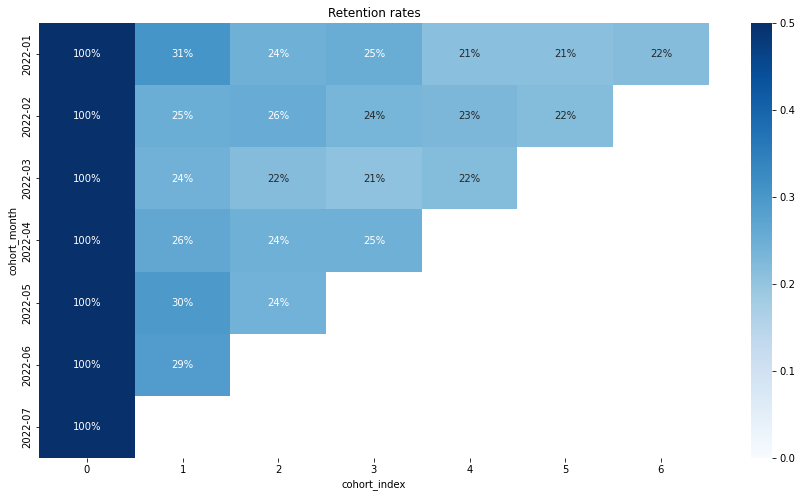

In [267]:
plt.figure(figsize=(15, 8))
plt.title('Retention rates')
sns.heatmap(data=retention,annot = True,fmt = '.0%',vmin = 0.0,vmax = 0.5,cmap="Blues")
plt.show()
#Heatmap is an effective way to visualize cohort analysis 

## Forcasting
##### question 1 - part 2 

In [268]:
data2 = data1
data2

,order_id,user_id,created_at,discount_cost,discount_type,basket,cohort_date,cohort_month,cohort_index
0,6,6,2022-01-01,0,0.0,10000,2022-01-01,2022-01,0
1,7,7,2022-01-01,0,0.0,29500,2022-01-01,2022-01,0
2,8,8,2022-01-01,10000,1.0,10000,2022-01-01,2022-01,0
3,9,9,2022-01-01,0,0.0,5000,2022-01-01,2022-01,0
4,10,10,2022-01-01,0,0.0,35000,2022-01-01,2022-01,0
...,...,...,...,...,...,...,...,...,...
29047,29053,6622,2022-07-31,0,0.0,18000,2022-05-18,2022-05,2
29048,29054,9985,2022-07-31,0,0.0,25000,2022-07-31,2022-07,0
29049,29055,8843,2022-07-31,6000,1.0,24000,2022-07-07,2022-07,0
29050,29056,8703,2022-07-31,0,0.0,40000,2022-07-04,2022-07,0


In [269]:
july_data = data2[data2['cohort_date'].dt.month == 7]
july_data

,order_id,user_id,created_at,discount_cost,discount_type,basket,cohort_date,cohort_month,cohort_index
22664,22670,8471,2022-07-01,0,0.0,27000,2022-07-01,2022-07,0
22666,22672,8472,2022-07-01,0,0.0,12000,2022-07-01,2022-07,0
22668,22674,8473,2022-07-01,10000,1.0,23000,2022-07-01,2022-07,0
22671,22677,8474,2022-07-01,10000,1.0,55000,2022-07-01,2022-07,0
22675,22681,8475,2022-07-01,0,0.0,13000,2022-07-01,2022-07,0
...,...,...,...,...,...,...,...,...,...
29033,29039,9984,2022-07-31,0,0.0,22000,2022-07-31,2022-07,0
29046,29052,8523,2022-07-31,0,0.0,10000,2022-07-01,2022-07,0
29048,29054,9985,2022-07-31,0,0.0,25000,2022-07-31,2022-07,0
29049,29055,8843,2022-07-31,6000,1.0,24000,2022-07-07,2022-07,0


In [270]:
cohort_data

,cohort_month,cohort_index,user_id
0,2022-01,0,1492
1,2022-01,1,457
2,2022-01,2,365
3,2022-01,3,378
4,2022-01,4,316
5,2022-01,5,317
6,2022-01,6,324
7,2022-02,0,1539
8,2022-02,1,385
9,2022-02,2,393


In [271]:
cohort_data[cohort_data['cohort_index']==0]

,cohort_month,cohort_index,user_id
0,2022-01,0,1492
7,2022-02,0,1539
13,2022-03,0,1258
18,2022-04,0,1592
22,2022-05,0,1192
25,2022-06,0,1397
27,2022-07,0,1515


In [272]:
cohort_data[cohort_data['cohort_index']==1]

,cohort_month,cohort_index,user_id
1,2022-01,1,457
8,2022-02,1,385
14,2022-03,1,306
19,2022-04,1,421
23,2022-05,1,352
26,2022-06,1,405


In [273]:
a_0 = cohort_data[cohort_data['cohort_index']==0]['user_id']
a_0.index = range(7)
a_0

0    1492
1    1539
2    1258
3    1592
4    1192
5    1397
6    1515
Name: user_id, dtype: int64

In [274]:
a_0 = a_0[0:6]
a_0

0    1492
1    1539
2    1258
3    1592
4    1192
5    1397
Name: user_id, dtype: int64

In [275]:
a_1 = cohort_data[cohort_data['cohort_index']==1]['user_id']
a_1.index = range(6)
a_1

0    457
1    385
2    306
3    421
4    352
5    405
Name: user_id, dtype: int64

In [276]:
users_num = pd.DataFrame({'new_users_num': list(a_0),
                    'pre_users_num': list(a_1)})
users_num

,new_users_num,pre_users_num
0,1492,457
1,1539,385
2,1258,306
3,1592,421
4,1192,352
5,1397,405


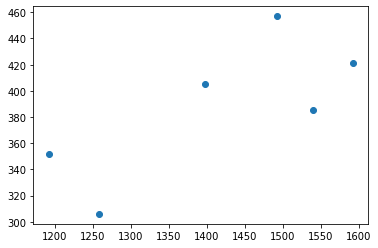

In [277]:
plt.scatter(x = users_num['new_users_num']  , y = users_num['pre_users_num'])

In [278]:
x = np.array(users_num['new_users_num'])
y = np.array(users_num['pre_users_num'])

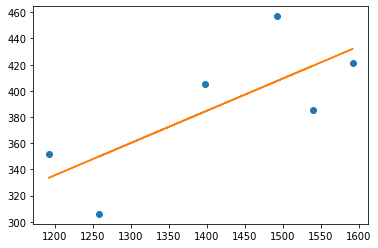

In [279]:
plt.plot(x, y, 'o')
m, b = np.polyfit(x , y, 1)
plt.plot(x, m*x+b)
plt.show()

In [280]:
m

0.2464956208356032

In [281]:
b

39.697015253740325

In [282]:
# Regression line -> y = 0.246*x + 39.697
# x = 1515 y = ?
prediction  = m*1515+b
prediction 
#it is expected that 413 users which joined in july order in August

413.1378808196792

# Question 2 

In [283]:
data1

,order_id,user_id,created_at,discount_cost,discount_type,basket,cohort_date,cohort_month,cohort_index
0,6,6,2022-01-01,0,0.0,10000,2022-01-01,2022-01,0
1,7,7,2022-01-01,0,0.0,29500,2022-01-01,2022-01,0
2,8,8,2022-01-01,10000,1.0,10000,2022-01-01,2022-01,0
3,9,9,2022-01-01,0,0.0,5000,2022-01-01,2022-01,0
4,10,10,2022-01-01,0,0.0,35000,2022-01-01,2022-01,0
...,...,...,...,...,...,...,...,...,...
29047,29053,6622,2022-07-31,0,0.0,18000,2022-05-18,2022-05,2
29048,29054,9985,2022-07-31,0,0.0,25000,2022-07-31,2022-07,0
29049,29055,8843,2022-07-31,6000,1.0,24000,2022-07-07,2022-07,0
29050,29056,8703,2022-07-31,0,0.0,40000,2022-07-04,2022-07,0


In [284]:
discount_type_data = data1.groupby(['discount_type','cohort_index'])['user_id'].nunique().reset_index()
discount_type_data

,discount_type,cohort_index,user_id
0,0.0,0,5998
1,0.0,1,1924
2,0.0,2,1441
3,0.0,3,1235
4,0.0,4,830
5,0.0,5,571
6,0.0,6,287
7,1.0,0,4426
8,1.0,1,595
9,1.0,2,411


In [285]:
#number of first users for each type of discount
discount_type_data[discount_type_data['cohort_index'] ==0]

,discount_type,cohort_index,user_id
0,0.0,0,5998
7,1.0,0,4426
14,2.0,0,55


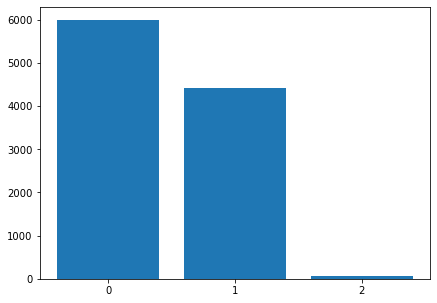

In [286]:
plt.figure(figsize = (7, 5))
plt.bar(list(discount_type_data['discount_type']) , list(discount_type_data['user_id']) )
plt.xticks(range(0, 3))
plt.show()
# 0 -> no discount
# 1 -> discount type I
# 2 -> discount type II
# discount type I is doing better in comparison with discount type II

In [287]:
discount_cost_data = data1.groupby(['discount_cost','cohort_index'])['user_id'].nunique().reset_index()
discount_cost_data

,discount_cost,cohort_index,user_id
0,0,0,5998
1,0,1,1924
2,0,2,1441
3,0,3,1235
4,0,4,830
...,...,...,...
203,39500,0,1
204,40000,0,6
205,40000,1,3
206,40000,2,2


In [288]:
discount_cost_data1 = discount_cost_data.loc[discount_cost_data['discount_cost']>0][discount_cost_data['cohort_index'] == 0]
discount_cost_data1

C:\Users\Amirreza\AppData\Local\Temp/ipykernel_4140/1656633291.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  discount_cost_data1 = discount_cost_data.loc[discount_cost_data['discount_cost']>0][discount_cost_data['cohort_index'] == 0]


,discount_cost,cohort_index,user_id
7,800,0,1
8,1000,0,1
9,1100,0,1
10,1200,0,1
11,1250,0,1
...,...,...,...
197,35000,0,3
198,37000,0,1
202,39400,0,1
203,39500,0,1


In [289]:
discount_cost_data1.drop(columns = 'cohort_index' , inplace=True)

In [290]:
discount_cost_data1

,discount_cost,user_id
7,800,1
8,1000,1
9,1100,1
10,1200,1
11,1250,1
...,...,...
197,35000,3
198,37000,1
202,39400,1
203,39500,1


In [291]:
discount_cost_data1["discrete_intervals"] = pd.cut(discount_cost_data1['discount_cost'], 
                                  bins=4,
                                  include_lowest=True)
discount_cost_data1
# Discount costs are divided to 4 categories
# [800, 10000] , [10000, 20000] , [20000, 30000] , [30000, 40000]

,discount_cost,user_id,discrete_intervals
7,800,1,"(760.799, 10600.0]"
8,1000,1,"(760.799, 10600.0]"
9,1100,1,"(760.799, 10600.0]"
10,1200,1,"(760.799, 10600.0]"
11,1250,1,"(760.799, 10600.0]"
...,...,...,...
197,35000,3,"(30200.0, 40000.0]"
198,37000,1,"(30200.0, 40000.0]"
202,39400,1,"(30200.0, 40000.0]"
203,39500,1,"(30200.0, 40000.0]"


<AxesSubplot:xlabel='discrete_intervals'>

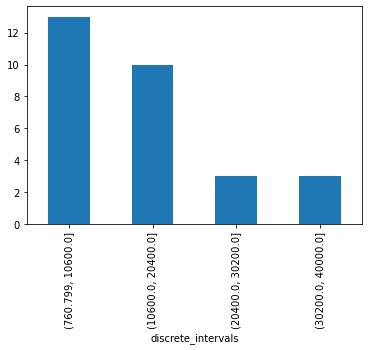

In [292]:
discount_cost_data1.groupby('discrete_intervals')['user_id'].nunique().plot(kind = 'bar')

#Most of discounts are placed in 2 categories [800, 10000] , [10000, 20000] 

In [293]:
discount_type_data2 = data1.groupby(['discount_type' ,'discount_cost','cohort_index'])['user_id'].nunique().reset_index()
discount_type_data2

,discount_type,discount_cost,cohort_index,user_id
0,0.0,0,0,5998
1,0.0,0,1,1924
2,0.0,0,2,1441
3,0.0,0,3,1235
4,0.0,0,4,830
...,...,...,...,...
220,2.0,14800,2,1
221,2.0,15000,4,1
222,2.0,17000,4,1
223,2.0,19200,0,1


In [294]:
discount_type_data2 = discount_type_data2.loc[discount_type_data2['discount_cost']>0][discount_type_data2['cohort_index'] == 0]
discount_type_data2

C:\Users\Amirreza\AppData\Local\Temp/ipykernel_4140/2298533762.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  discount_type_data2 = discount_type_data2.loc[discount_type_data2['discount_cost']>0][discount_type_data2['cohort_index'] == 0]


,discount_type,discount_cost,cohort_index,user_id
7,1.0,800,0,1
9,1.0,3400,0,1
10,1.0,3500,0,1
12,1.0,5000,0,18
17,1.0,5500,0,1
...,...,...,...,...
203,2.0,8400,0,1
212,2.0,10200,0,2
213,2.0,10400,0,1
215,2.0,12000,0,2


<AxesSubplot:xlabel='discount_type'>

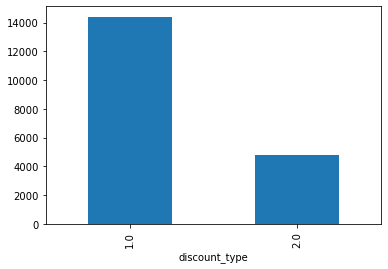

In [295]:
discount_type_data2.groupby('discount_type')['discount_cost'].mean().plot(kind = 'bar')
# Mean cost for discount typeI is higher 

In [317]:
discount_type_data2.groupby('discount_type')['discount_cost'].mean()

discount_type
1.0    14410.169492
2.0     4772.000000
Name: discount_cost, dtype: float64

# Question 3 

In [296]:
data3 = data
data3

,order_id,user_id,created_at,discount_cost,discount_type,basket
0,1,1,2021-04-12,10000,1.0,12000
1,2,2,2021-05-09,0,0.0,20000
2,3,3,2021-05-09,10000,1.0,14000
3,4,4,2021-11-10,0,0.0,15000
4,5,5,2021-11-10,10000,1.0,16000
...,...,...,...,...,...,...
29052,29053,6622,2022-07-31,0,0.0,18000
29053,29054,9985,2022-07-31,0,0.0,25000
29054,29055,8843,2022-07-31,6000,1.0,24000
29055,29056,8703,2022-07-31,0,0.0,40000


In [297]:
#first order
data3['first_order'] = data3.groupby('user_id')['created_at'].transform(min)
data3['first_order']

0       2021-04-12
1       2021-05-09
2       2021-05-09
3       2021-11-10
4       2021-11-10
           ...    
29052   2022-05-18
29053   2022-07-31
29054   2022-07-07
29055   2022-07-04
29056   2022-04-04
Name: first_order, Length: 29057, dtype: datetime64[ns]

In [298]:
#second_order
data3['second_order'] = data3.groupby('user_id')['created_at'].transform('nth' , 1)
data3

,order_id,user_id,created_at,discount_cost,discount_type,basket,first_order,second_order
0,1,1,2021-04-12,10000,1.0,12000,2021-04-12,2022-03-28
1,2,2,2021-05-09,0,0.0,20000,2021-05-09,2022-06-04
2,3,3,2021-05-09,10000,1.0,14000,2021-05-09,2022-03-28
3,4,4,2021-11-10,0,0.0,15000,2021-11-10,2022-03-12
4,5,5,2021-11-10,10000,1.0,16000,2021-11-10,2022-01-18
...,...,...,...,...,...,...,...,...
29052,29053,6622,2022-07-31,0,0.0,18000,2022-05-18,2022-07-24
29053,29054,9985,2022-07-31,0,0.0,25000,2022-07-31,NaT
29054,29055,8843,2022-07-31,6000,1.0,24000,2022-07-07,2022-07-15
29055,29056,8703,2022-07-31,0,0.0,40000,2022-07-04,2022-07-16


In [299]:
#third_order
data3['third_order'] = data3.groupby('user_id')['created_at'].transform('nth' , 2)
data3

,order_id,user_id,created_at,discount_cost,discount_type,basket,first_order,second_order,third_order
0,1,1,2021-04-12,10000,1.0,12000,2021-04-12,2022-03-28,2022-03-31
1,2,2,2021-05-09,0,0.0,20000,2021-05-09,2022-06-04,NaT
2,3,3,2021-05-09,10000,1.0,14000,2021-05-09,2022-03-28,2022-07-17
3,4,4,2021-11-10,0,0.0,15000,2021-11-10,2022-03-12,2022-04-09
4,5,5,2021-11-10,10000,1.0,16000,2021-11-10,2022-01-18,NaT
...,...,...,...,...,...,...,...,...,...
29052,29053,6622,2022-07-31,0,0.0,18000,2022-05-18,2022-07-24,2022-07-31
29053,29054,9985,2022-07-31,0,0.0,25000,2022-07-31,NaT,NaT
29054,29055,8843,2022-07-31,6000,1.0,24000,2022-07-07,2022-07-15,2022-07-31
29055,29056,8703,2022-07-31,0,0.0,40000,2022-07-04,2022-07-16,2022-07-24


In [300]:
#fourth_order
data3['fourth_order'] = data3.groupby('user_id')['created_at'].transform('nth' , 3)
data3

,order_id,user_id,created_at,discount_cost,discount_type,basket,first_order,second_order,third_order,fourth_order
0,1,1,2021-04-12,10000,1.0,12000,2021-04-12,2022-03-28,2022-03-31,2022-05-09
1,2,2,2021-05-09,0,0.0,20000,2021-05-09,2022-06-04,NaT,NaT
2,3,3,2021-05-09,10000,1.0,14000,2021-05-09,2022-03-28,2022-07-17,2022-07-18
3,4,4,2021-11-10,0,0.0,15000,2021-11-10,2022-03-12,2022-04-09,NaT
4,5,5,2021-11-10,10000,1.0,16000,2021-11-10,2022-01-18,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...
29052,29053,6622,2022-07-31,0,0.0,18000,2022-05-18,2022-07-24,2022-07-31,NaT
29053,29054,9985,2022-07-31,0,0.0,25000,2022-07-31,NaT,NaT,NaT
29054,29055,8843,2022-07-31,6000,1.0,24000,2022-07-07,2022-07-15,2022-07-31,NaT
29055,29056,8703,2022-07-31,0,0.0,40000,2022-07-04,2022-07-16,2022-07-24,2022-07-31


In [301]:
data3 = data3.drop(index = list(range(5)))
data3.index = range(29052)

In [302]:
data3

,order_id,user_id,created_at,discount_cost,discount_type,basket,first_order,second_order,third_order,fourth_order
0,6,6,2022-01-01,0,0.0,10000,2022-01-01,2022-01-05,2022-01-11,2022-01-14
1,7,7,2022-01-01,0,0.0,29500,2022-01-01,2022-02-23,2022-03-16,2022-03-23
2,8,8,2022-01-01,10000,1.0,10000,2022-01-01,2022-05-17,2022-07-13,NaT
3,9,9,2022-01-01,0,0.0,5000,2022-01-01,2022-01-31,2022-02-01,2022-02-01
4,10,10,2022-01-01,0,0.0,35000,2022-01-01,2022-01-14,2022-01-25,2022-02-07
...,...,...,...,...,...,...,...,...,...,...
29047,29053,6622,2022-07-31,0,0.0,18000,2022-05-18,2022-07-24,2022-07-31,NaT
29048,29054,9985,2022-07-31,0,0.0,25000,2022-07-31,NaT,NaT,NaT
29049,29055,8843,2022-07-31,6000,1.0,24000,2022-07-07,2022-07-15,2022-07-31,NaT
29050,29056,8703,2022-07-31,0,0.0,40000,2022-07-04,2022-07-16,2022-07-24,2022-07-31


In [303]:
#difference between first and second order (days)
ord1_2 = []
for i in range(data3.shape[0]):
    ord1_2.append((data3.loc[i , 'second_order'] - data3.loc[i , 'first_order']).days)

In [304]:
data3['ord1_2'] = ord1_2
data3

,order_id,user_id,created_at,discount_cost,discount_type,basket,first_order,second_order,third_order,fourth_order,ord1_2
0,6,6,2022-01-01,0,0.0,10000,2022-01-01,2022-01-05,2022-01-11,2022-01-14,4.0
1,7,7,2022-01-01,0,0.0,29500,2022-01-01,2022-02-23,2022-03-16,2022-03-23,53.0
2,8,8,2022-01-01,10000,1.0,10000,2022-01-01,2022-05-17,2022-07-13,NaT,136.0
3,9,9,2022-01-01,0,0.0,5000,2022-01-01,2022-01-31,2022-02-01,2022-02-01,30.0
4,10,10,2022-01-01,0,0.0,35000,2022-01-01,2022-01-14,2022-01-25,2022-02-07,13.0
...,...,...,...,...,...,...,...,...,...,...,...
29047,29053,6622,2022-07-31,0,0.0,18000,2022-05-18,2022-07-24,2022-07-31,NaT,67.0
29048,29054,9985,2022-07-31,0,0.0,25000,2022-07-31,NaT,NaT,NaT,NaN
29049,29055,8843,2022-07-31,6000,1.0,24000,2022-07-07,2022-07-15,2022-07-31,NaT,8.0
29050,29056,8703,2022-07-31,0,0.0,40000,2022-07-04,2022-07-16,2022-07-24,2022-07-31,12.0


In [305]:
#difference between second and third order (days)
ord2_3 = []
for i in range(data3.shape[0]):
    ord2_3.append((data3.loc[i , 'third_order'] - data3.loc[i , 'second_order']).days)

In [306]:
data3['ord2_3'] = ord2_3
data3

,order_id,user_id,created_at,discount_cost,discount_type,basket,first_order,second_order,third_order,fourth_order,ord1_2,ord2_3
0,6,6,2022-01-01,0,0.0,10000,2022-01-01,2022-01-05,2022-01-11,2022-01-14,4.0,6.0
1,7,7,2022-01-01,0,0.0,29500,2022-01-01,2022-02-23,2022-03-16,2022-03-23,53.0,21.0
2,8,8,2022-01-01,10000,1.0,10000,2022-01-01,2022-05-17,2022-07-13,NaT,136.0,57.0
3,9,9,2022-01-01,0,0.0,5000,2022-01-01,2022-01-31,2022-02-01,2022-02-01,30.0,1.0
4,10,10,2022-01-01,0,0.0,35000,2022-01-01,2022-01-14,2022-01-25,2022-02-07,13.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...
29047,29053,6622,2022-07-31,0,0.0,18000,2022-05-18,2022-07-24,2022-07-31,NaT,67.0,7.0
29048,29054,9985,2022-07-31,0,0.0,25000,2022-07-31,NaT,NaT,NaT,NaN,NaN
29049,29055,8843,2022-07-31,6000,1.0,24000,2022-07-07,2022-07-15,2022-07-31,NaT,8.0,16.0
29050,29056,8703,2022-07-31,0,0.0,40000,2022-07-04,2022-07-16,2022-07-24,2022-07-31,12.0,8.0


In [307]:
#difference between third and fourth order (days)
ord3_4 = []
for i in range(data3.shape[0]):
    ord3_4.append((data3.loc[i , 'fourth_order'] - data3.loc[i , 'third_order']).days)

In [308]:
data3['ord3_4'] = ord3_4
data3

,order_id,user_id,created_at,discount_cost,discount_type,basket,first_order,second_order,third_order,fourth_order,ord1_2,ord2_3,ord3_4
0,6,6,2022-01-01,0,0.0,10000,2022-01-01,2022-01-05,2022-01-11,2022-01-14,4.0,6.0,3.0
1,7,7,2022-01-01,0,0.0,29500,2022-01-01,2022-02-23,2022-03-16,2022-03-23,53.0,21.0,7.0
2,8,8,2022-01-01,10000,1.0,10000,2022-01-01,2022-05-17,2022-07-13,NaT,136.0,57.0,NaN
3,9,9,2022-01-01,0,0.0,5000,2022-01-01,2022-01-31,2022-02-01,2022-02-01,30.0,1.0,0.0
4,10,10,2022-01-01,0,0.0,35000,2022-01-01,2022-01-14,2022-01-25,2022-02-07,13.0,11.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29047,29053,6622,2022-07-31,0,0.0,18000,2022-05-18,2022-07-24,2022-07-31,NaT,67.0,7.0,NaN
29048,29054,9985,2022-07-31,0,0.0,25000,2022-07-31,NaT,NaT,NaT,NaN,NaN,NaN
29049,29055,8843,2022-07-31,6000,1.0,24000,2022-07-07,2022-07-15,2022-07-31,NaT,8.0,16.0,NaN
29050,29056,8703,2022-07-31,0,0.0,40000,2022-07-04,2022-07-16,2022-07-24,2022-07-31,12.0,8.0,7.0


In [309]:
data3['ord1_2'].describe()

count    23511.000000
mean        22.133937
std         28.886779
min          0.000000
25%          5.000000
50%         11.000000
75%         28.000000
max        391.000000
Name: ord1_2, dtype: float64

In [310]:
data3['ord2_3'].describe()

count    20423.000000
mean        15.938011
std         21.560506
min          0.000000
25%          4.000000
50%          8.000000
75%         18.000000
max        184.000000
Name: ord2_3, dtype: float64

In [311]:
data3['ord3_4'].describe()

count    17892.000000
mean        14.142242
std         18.954990
min          0.000000
25%          3.000000
50%          7.000000
75%         16.000000
max        167.000000
Name: ord3_4, dtype: float64

In [312]:
ord_dif = []
for i in [10,11,12]:
    ord_dif.append(data3.iloc[:,i].mean()) 

In [313]:
ord_dif

[22.1339373059419, 15.93801106595505, 14.142242342946568]

<BarContainer object of 3 artists>

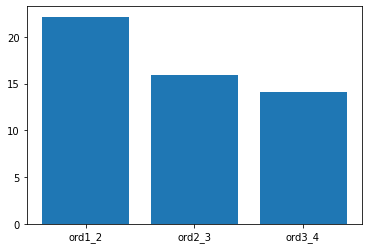

In [314]:
plt.bar(['ord1_2','ord2_3','ord3_4'],ord_dif )
#The mean interval between ord1_2 is more than the mean interval between ord2_3 ...
#It is expected that the average time interval for subsequent orders will decrease.